In [4]:
#enabling all executed lines within cell to be viewed not only the most recent
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
### DATA ANALYSIS ###

#Read in the csv containing NBA free throws. 

#import libraries required
import numpy as np
import pandas as pd

free_throws = pd.read_csv("free_throws.csv", header = 0, sep = ',')

#check object type of train and test
type(free_throws)

#print shape
print('Number rows and columns in free throws dataset:',free_throws.shape)

#list of all features
free_throws.columns.values

#view top rows
free_throws.head()

#summary of data
free_throws.info()


pandas.core.frame.DataFrame

Number rows and columns in free throws dataset: (618019, 11)


array(['end_result', 'game', 'game_id', 'period', 'play', 'player',
       'playoffs', 'score', 'season', 'shot_made', 'time'], dtype=object)

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618019 entries, 0 to 618018
Data columns (total 11 columns):
end_result    618019 non-null object
game          618019 non-null object
game_id       618019 non-null float64
period        618019 non-null float64
play          618019 non-null object
player        618019 non-null object
playoffs      618019 non-null object
score         618019 non-null object
season        618019 non-null object
shot_made     618019 non-null int64
time          618019 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 51.9+ MB


131.94623655913978

89.0

pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 322 to 139
Data columns (total 5 columns):
season        30 non-null object
player        30 non-null object
sum           30 non-null int64
count         30 non-null int64
successful    30 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


,season,player,sum,count,successful
322,2015 - 2016,Stephen Curry,439,483,0.908903
93,2015 - 2016,Jamal Crawford,267,296,0.902027
224,2015 - 2016,Chris Paul,309,343,0.900875
407,2015 - 2016,Kevin Durant,577,644,0.895963
32,2015 - 2016,Dirk Nowitzki,266,297,0.895623


[Text(0,0.5,'Player'),
 Text(0.5,0,'2015-2016 Free Throws'),
 Text(0.5,1,'Top 30 Players Ordered by Successful Free Throw % (min 132 throws during 2015-2016 season)')]

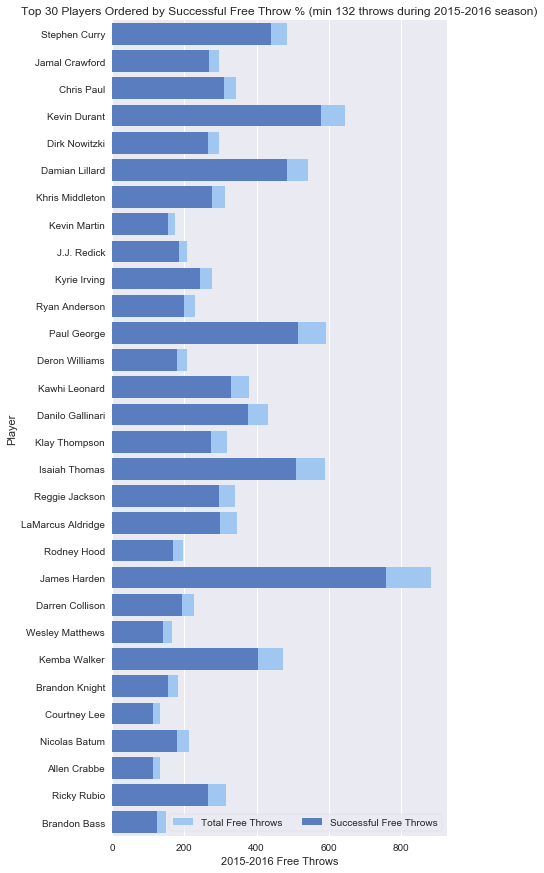

In [162]:
### DATA ANALYSIS ###

#Visualise some aspect of the data you find interesting, 
#e.g., the average number of free throws per period for the regular season and the playoffs.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data to use for plotting
top_n = 30
season = '2015 - 2016'

#create total and successful free throws by season and player
free_throws_v1 = free_throws.groupby(['season','player'])['shot_made'].agg(['sum','count']).sort_values('season', ascending=False).reset_index()
#create successful free throw percentage
free_throws_v1['successful'] = free_throws_v1['sum'] / free_throws_v1['count']

#check summary stats
free_throws_2016 = free_throws_v1.loc[(free_throws_v1['season'] == season)]
mean_throws = free_throws_2016['count'].mean()
median_throws = free_throws_2016['count'].median()
mean_throws
median_throws

#create final data for plotting
free_throws_summary = free_throws_v1.loc[(free_throws_v1['season'] == season) & (free_throws_v1['count'] > mean_throws)].sort_values('successful', ascending=False)
free_throws_summary = free_throws_summary.head(top_n)

type(free_throws_summary)
free_throws_summary.info()
free_throws_summary.head()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total free throws by player
sns.set_color_codes("pastel")
sns.barplot(x="count", y="player", data=free_throws_summary,
            label="Total Free Throws", color="b")

# Plot the total free throws by player
sns.set_color_codes("muted")
sns.barplot(x="sum", y="player", data=free_throws_summary,
            label="Successful Free Throws", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(title = "Top 30 Players Ordered by Successful Free Throw % (min 132 throws during 2015-2016 season)",
       ylabel="Player",
       xlabel="2015-2016 Free Throws")
sns.despine(left=True, bottom=True)

In [3]:
### PROGRAMMING ###
## Functions ##

#Write a function that will draw random numbers from a given distribution.
#The function should take one argument for the number of samples 
#and a second argument which specifies the distribution (Normal, Poisson or Binomial). 
#The function should be able to handle additional parameters depending on the distribution chosen,
#e.g., mean and sd for Normal samples.

import numpy as np
import random
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom

def sample_distribution_func(samples, distribution, mean=0, sd=1, mu=3, n=10, p=0.5):
    """This function will draw random numbers from a given distribution (Normal, Poisson, Binomial).
        
        It takes one argument for the number of samples and a second argument which specifies the
        distribution (Normal, Poisson or Binomial). 
        
        The function can also handle additional parameters depending on the distribution chosen"""
    
    f_sampled_distribution = np.zeros(shape=[0, 1])
    
    if distribution == "Normal":
        f_sampled_distribution = norm.rvs(size=samples, loc=mean, scale=sd)
        print (samples, "samples of a", distribution, "distribution with parameter values of mean =", mean, "and sd =", sd)
        return f_sampled_distribution
    elif distribution == "Poisson":
        f_sampled_distribution = poisson.rvs(size=samples, mu=mu)
        print (samples, "samples of a", distribution, "distribution with a parameter value of mu =", mu)
        return f_sampled_distribution
    elif distribution == "Binomial":
        f_sampled_distribution = binom.rvs(size=samples, n=n, p=p)
        print (samples, "samples of a", distribution, "distribution with parameter values of n =", n, "and p =", p)
        return f_sampled_distribution
    else:
        print('ERROR!:', distribution, "distribution is not defined within function")
        return f_sampled_distribution

In [4]:
### PROGRAMMING ###

## Functions ##

#Write a function that will draw random numbers from a given distribution.
#The function should take one argument for the number of samples 
#and a second argument which specifies the distribution (Normal, Poisson or Binomial). 
#The function should be able to handle additional parameters depending on the distribution chosen,
#e.g., mean and sd for Normal samples.

import numpy as np
import random
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom

def sample_distribution_func(samples, distribution, **params):
    """This function will draw random numbers from a given distribution (Normal, Poisson, Binomial).
        
        It takes one argument for the number of samples and a second argument which specifies the
        distribution (Normal, Poisson or Binomial). 
        
        The function can also handle additional parameters depending on the distribution chosen"""
    
    f_sampled_distribution = np.zeros(shape=[0, 1])
    
    if distribution == "Normal":
        f_sampled_distribution = norm.rvs(size=samples, loc=params['mean'], scale=params['sd'])
        print (samples, "samples of a", distribution, "distribution with parameter values of mean =", params['mean'], "and sd =", params['sd'])
        return f_sampled_distribution
    elif distribution == "Poisson":
        f_sampled_distribution = poisson.rvs(size=samples, mu=params['mu'])
        print (samples, "samples of a", distribution, "distribution with a parameter value of mu =", params['mu'])
        return f_sampled_distribution
    elif distribution == "Binomial":
        f_sampled_distribution = binom.rvs(size=samples, n=params['n'], p=params['p'])
        print (samples, "samples of a", distribution, "distribution with parameter values of n =", params['n'], "and p =", params['p'])
        return f_sampled_distribution
    else:
        print('ERROR!:', distribution, "distribution is not defined within function")
        return f_sampled_distribution

Help on function sample_distribution_func in module __main__:

sample_distribution_func(samples, distribution, **params)
    This function will draw random numbers from a given distribution (Normal, Poisson, Binomial).
    
    It takes one argument for the number of samples and a second argument which specifies the
    distribution (Normal, Poisson or Binomial). 
    
    The function can also handle additional parameters depending on the distribution chosen

10000 samples of a Normal distribution with parameter values of mean = 0 and sd = 1


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal')]

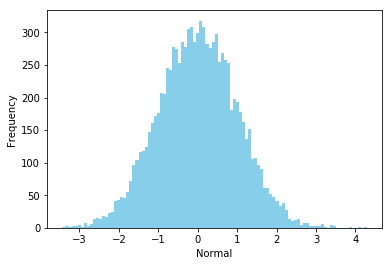

In [5]:
### PROGRAMMING ###
## Functions ##

#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000 
distribution = 'Normal'
#select normal distribution parameters
mean=0 
sd=1
#select poisson distribution parameter
mu=3
#select binomial distribution parameters
n=10 
p=0.5

help(sample_distribution_func)

#call function
f_sampled_distribution = sample_distribution_func(samples=samples, distribution=distribution, 
                                            mean=mean, sd=sd, 
                                            mu=mu,   
                                            n=n, p=p) 

#plot distribution
ax = sns.distplot(f_sampled_distribution,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel=distribution, ylabel='Frequency')

In [6]:
### PROGRAMMING ###
## Object-oriented programming ##

#Construct an alternative to the above solution by using one or more classes instead of a single function.
#Instances of this distribution class should store the distribution parameters as attributes, 
#and also contain a draw method, which draws a fresh set of random numbers according to the distributions parameters,
#and a summarise method, which prints the min, max, mean, and standard deviation of the newly drawn sample.

import numpy as np
import random
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom

class SampleDistributionClass:
    """docstring"""

    # Initializer / Instance attributes
    def __init__(self, samples=10000, distribution='Normal'):
        self.samples = samples
        self.distribution = distribution
        print ("----------------------------",
               "{} samples of a {} distribution selected".format(self.samples, self.distribution),
               "----------------------------", 
               sep="\n")
    
    # instance draw method
    def draw(self, mean=0, sd=1, mu=3, n=10, p=0.5):
        self.mean = mean
        self.sd = sd
        self.mu = mu
        self.n = n     
        self.p = p
        
        self.cls_sampled_distribution = np.zeros(shape=[self.samples, 1])

        if self.distribution == "Normal":
            self.cls_sampled_distribution = norm.rvs(size=self.samples, loc=self.mean, scale=self.sd)
            print ("----------------------------",
                   "Normal distribution parameters: mean = {}; standard deviation = {}".format(self.mean, self.sd),
                   "----------------------------", 
                   sep="\n")
            return self.cls_sampled_distribution
        
        elif self.distribution == "Poisson":
            self.cls_sampled_distribution = poisson.rvs(size=self.samples, mu=self.mu)
            print ("----------------------------",
                   "Poisson distribution parameter: rate = {}".format(self.mu),
                   "----------------------------",
                   sep="\n")
            return self.cls_sampled_distribution
        
        elif self.distribution == "Binomial":
            self.cls_sampled_distribution = binom.rvs(size=self.samples, n=self.n, p=self.p)
            print ("----------------------------",
                   "Binomial distribution parameters: number of trials = {}; probability = {}".format(self.n, self.p),
                   "----------------------------",
                   sep="\n")
            return self.cls_sampled_distribution
        
        else:
            print ("----------------------------",
                   "ERROR!: {} distribution is not defined within function".format(self.distribution),
                   "----------------------------",
                   sep="\n")
            
     # instance summarise method
    def summarise(self):
        self.summary_min = self.cls_sampled_distribution.min()
        self.summary_max = self.cls_sampled_distribution.max()
        self.summary_mean = self.cls_sampled_distribution.mean()
        self.summary_sd = self.cls_sampled_distribution.std()
        print ("----------------------------",
                "Summary stats for {} samples of {} distribution:".format(self.samples, self.distribution),
               "----------------------------",
               "Min = {}".format(self.summary_min),
               "Max = {}".format(self.summary_max),
               "Mean = {}".format(self.summary_mean),
               "Standard Deviation = {}".format(self.summary_sd),
               "END",
               sep="\n")

----------------------------
10000 samples of a Normal distribution selected
----------------------------
----------------------------
Normal distribution parameters: mean = 0; standard deviation = 1
----------------------------
----------------------------
Summary stats for 10000 samples of Normal distribution:
----------------------------
Min = -4.091848103544985
Max = 3.675990752775589
Mean = 0.005956071016956793
Standard Deviation = 1.0049995068719457
END


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal')]

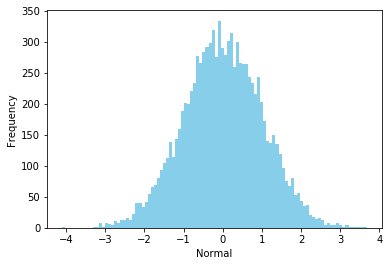

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Default parameters
#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000
distribution = 'Normal'
#select normal distribution parameters
mean=0 
sd=1
#select poisson distribution parameter
mu=3
#select binomial distribution parameters
n=10 
p=0.5

# Create an instance of SampleDistributionClass with Normal parameters
default_instance = SampleDistributionClass()
# Draw samples from selected distribution
cls_sampled_distribution = default_instance.draw()
# Summarise selected disribution
default_instance.summarise()

#plot distribution
ax = sns.distplot(cls_sampled_distribution,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel=distribution, ylabel='Frequency')

----------------------------
10000 samples of a Normal distribution selected
----------------------------
----------------------------
Normal distribution parameters: mean = 0; standard deviation = 1
----------------------------
----------------------------
Summary stats for 10000 samples of Normal distribution:
----------------------------
Min = -4.219613787697406
Max = 3.880611114306182
Mean = -0.004760629024133421
Standard Deviation = 1.006999646160139
END


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal')]

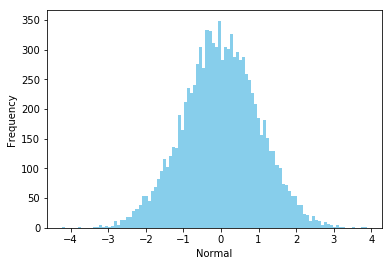

In [11]:
#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000
distribution = 'Normal'
#select normal distribution parameters
mean=0 
sd=1

# Create an instance of SampleDistributionClass with Normal parameters
normal_instance = SampleDistributionClass(samples=samples, distribution=distribution)
# Draw samples from selected distribution
cls_sampled_distribution = normal_instance.draw(mean=0, sd=1)
# Summarise selected distribution
normal_instance.summarise()

#plot distribution
ax = sns.distplot(cls_sampled_distribution,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel=distribution, ylabel='Frequency')

----------------------------
10000 samples of a Poisson distribution selected
----------------------------
----------------------------
Poisson distribution parameter: rate = 3
----------------------------
----------------------------
Summary stats for 10000 samples of Poisson distribution:
----------------------------
Min = 0
Max = 11
Mean = 2.9993
Standard Deviation = 1.7357705810388653
END


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Poisson')]

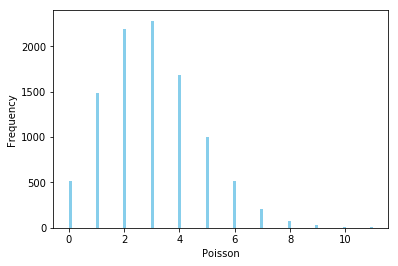

In [12]:
#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000
distribution = 'Poisson'

#select poisson distribution parameter
mu=3

# Create an instance of SampleDistributionClass with Poisson parameters
poisson_instance = SampleDistributionClass(samples=samples, distribution=distribution)
# Draw samples from selected distribution
cls_sampled_distribution = poisson_instance.draw()
# Summarise selected distribution
poisson_instance.summarise()

#plot distribution
ax = sns.distplot(cls_sampled_distribution,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel=distribution, ylabel='Frequency')

----------------------------
100 samples of a Binomial distribution selected
----------------------------
----------------------------
Binomial distribution parameters: number of trials = 10; probability = 0.5
----------------------------
----------------------------
Summary stats for 100 samples of Binomial distribution:
----------------------------
Min = 1
Max = 8
Mean = 4.94
Standard Deviation = 1.5480310074413886
END


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial')]

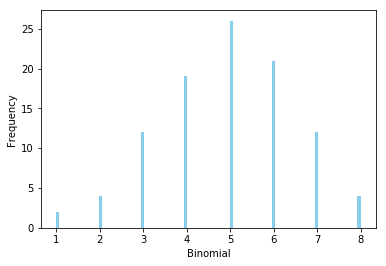

In [25]:
#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000
distribution = 'Binomial'

#select binomial distribution parameters
n=10 
p=0.5

# Create an instance of SampleDistributionClass with Binomial parameters
binomial_instance = SampleDistributionClass(samples=100, distribution='Binomial')
# Draw samples from selected distribution 
cls_sampled_distribution = binomial_instance.draw()
# Summarise selected distribution
binomial_instance.summarise()

#plot distribution
ax = sns.distplot(cls_sampled_distribution,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel=distribution, ylabel='Frequency')

In [21]:
#select sample size and distribution (Normal, Poisson or Binomial)
samples = 10000
distribution = 'Other'

# Create an instance of SampleDistributionClass with Other parameters
other_instance = SampleDistributionClass(samples=samples, distribution=distribution)
# Draw samples from selected distribution 
cls_sampled_distribution = other_instance.draw()
# Summarise selected distribution
other_instance.summarise()

----------------------------
10000 samples of a Other distribution selected
----------------------------
----------------------------
ERROR!: Other distribution is not defined within function
----------------------------
----------------------------
Summary stats for 10000 samples of Other distribution:
----------------------------
Min = 0.0
Max = 0.0
Mean = 0.0
Standard Deviation = 0.0
END


In [22]:
### PROGRAMMING ###
## Package Building ##

#Build a package containing the functions and classes above. 
#Use any tools as necessary. Include instructions on how the package can be installed.